# Razgradnja slik s poravnavo atlasov

Avtomatska razgradnja slik temelji na osnovnih lastnostih opazovanih struktur, kot so sivinske vrednosti, tekstura, oblika, itd. Pogosto se pri razgradnji srečamo s strukturami, ki so po sivinski vrednosti ali teksturi povsem enake, lahko imajo tudi enako obliko in se stikajo v prostoru, kar precej otežuje njihovo razgradnjo. Primer tovrstnih struktur v osrednji sivi možganovini je prikazan na [sliki 1](#fig_primer)a. Za razgradnjo teh struktur se lahko zanašamo na predznanje o lastnostih struktur zanimanja, kot naprimer anatomska lega in medsebojna povezanost in soodvisnost (lege in/ali oblike) področij zanimanja. Tovrstno predznanje za razgradnjo neke nove slike je lahko podano s podobno sliko, za katero imamo na voljo natančne razgradnje struktur zanimanja, čemur pravimo tudi *topološki atlas* ([sliki 1](#fig_primer)bc). Razgradnjo lahko naredimo s poravnavo topološkega atlasa na novo sliko in preslikovanjem značk (ang. *label propagation*). Natančnost tovrstne razgradnje zavisi predvsem od natančnosti poravnave slik. Ker je topološki atlas praviloma pridobljen na drugem subjektu kot nova slika moramo običajno uporabiti netogo poravnavo slik za prileganje atlasa na sliko subjekta. Po drugi strani en sam topološki atlas ne kodira običajno precej visoke biološke variabilnosti med subjekti, zato je smiselno uporabiti več topoloških atlasov za razgradnjo slik. To lahko naredimo s poravnavo vseh topoloških atlasov na novo sliko in zlivanjem značk (ang. *label fusion*). Prednost zlivanja značk je tudi v tem, da lahko kompenzira napake zaradi netočne poravnave slik. Razgradnja slik z zlivanjem značk je ena od uveljavljenih tehnik razgradnje, razvoj postopkov zlivanja značk pa je aktivno raziskovalno področje, zato bomo tekom vaje podrobneje analizirali nekatere najbolj uveljavljene in učinkovite postopke zlivanja.

<a id='fig_primer'></a>
<img src="images/SLO_Atlas.png" alt="Atlas" style="float;left;width: 800px;"/>
(a) prečna rezina T1-utežene MR slike glave in (b) pripadajoči topološki atlas struktur v osrednji sivi možganovini &ndash; kavdatno jedro (*roza*), putamen (*modra*), palidus (*rumena*) in talamus (*vijolična*). (c) Vizualizacija teh struktur v 3D.

 
 
Tehnike zlivanja lahko uporabimo tudi na poravnanih slikah in tako zgradimo referenčni oz. *populacijski* atlas &ndash; ta lahko predstavlja povprečno anatomsko obliko struktur zanimanja za neko skupino subjektov. S poravnavnimi značkami lahko zgradimo *statistični* atlas, ki predstavlja *a priori* verjetnost posamezne strukture v prostoru. Statistični atlasi se pogosto uporabljajo kot predznanje pri razgradnji z rojenjem, bodisi za inicializacijo postopka rojenja bodisi za vpeljevanje prostorske povezanosti struktur pri razgradnji slik z analizo rojev.
 


<a id='fig_strategije'></a>
### Slika 2: Strategije razgradnje z atlasi

<img src="images/SLO_Strategije.png" alt="Atlas" style="float;left;width: 800px;"/>
Strategiji razgradnje z atlasi: (a) s poravnavo atlas na novo sliko subjekta; (b) s poravnavo večih atlasov in zlivanjem značk v razgradnjo slike subjekta. (c) Nepristranska poravnava skupine slik izboljoša natančno poravnave v primerjavi s poravnavo sliko po parih in se uporablja za izgradnjo statističnega atlasa.

## Strategije razgradnje z atlasi

Topološki atlas je dan s sivinsko sliko $\mathcal{I}(\mathbf{x})$, $\mathbf{x}\in \mathbb{R}^d$, kjer $d$ predstavlja dimenzionalnost slik, in pripadajočo razgradnjo $\mathcal{S}: \mathbf{x}\in \mathbb{R}^d \rightarrow \mathcal{S}(\mathbf{x}) \in L$, kjer so $L \in \mathbb{Z}^+$ značke struktur v atlasu.

Najbolj osnovna strategija razgradnje z atlasom je **preslikovanje značk**, ki jo izvedemo z netogo poravnavo atlasa v prostor nove slike $\mathcal{J}(\mathbf{x})$:
$$
	\mathcal{S}_{\mathcal{J}}(\mathbf{x}) = \mathcal{T}^*(\mathcal{S}_{\mathcal{I}}(\mathbf{x})),\quad\mathcal{T}^* = \mathrm{argmax}_{\mathcal{T}} MP(\mathcal{T}(\mathcal{I}), \mathcal{J})\,,
$$
kjer je $\mathcal{T}^*$ optimalna poravnava določena na podlagi maksimizacije mere podobnosti med slikama $\mathcal{I}$ in $\mathcal{J}$. Za netogo poravnavo se najpogosteje uporablja preslikava z B-zlepki z maksimizacijo medsebojne informacije. Primer preslikovanja značk je prikazan  na [sliki 1](#fig_strategije)a.

Naprednejše strategije uporabljajo več topoloških atlasov $\mathcal{I}_n(\mathbf{x}), \mathcal{S}_n(\mathbf{x}); n=1,\ldots,N$ tako, da se vsi atlasi (slike in pripadajoče značke) poravnajo v prostor nove slike $\mathcal{J}(\mathbf{x})$, nato pa se značke zlijejo v nove značke, ki predstavljajo razgradnjo. Pogosto se uporabljajo tehnike zlivanja, ki temeljijo na **glasovanju**:

$$
\mathcal{S}_{\mathcal{J}}(\mathbf{x}) = \mathrm{argmax}_l \sum_{n=1}^{N} w_n(\mathbf{x}) \cdot f(\mathcal{T}_n(\mathcal{S}_n(\mathbf{x})), l),\,l\in L
$$ 

kjer $\mathcal{T}_n(\cdot)$ predstavlja poravnavo atlasa $\mathcal{I}_n$ na sliko $\mathcal{J}$, $l$ predstavlja značko, funkcija $f(\cdot)$ pa je določena kot:

$$	
f(\mathcal{T}_n(\mathcal{S}_n(\mathbf{x})), l)\left\{
	\begin{array}{ll}
	1:& \mathcal{T}_n(\mathcal{S}_n(\mathbf{x})) = l\\
	0:&	\mathcal{T}_n(\mathcal{S}_n(\mathbf{x})) \neq l\\
	\end{array}
	\right.
$$

Pri **glasovanju z večino** (ang. *majority voting*) so uteži $w_n(\mathbf{x})$ določene kot $w_n(\mathbf{x}) = 1/N$.

Naprednejša strategija, ki upošteva tudi podobnost struktur, je **glasovanje z lokalnim uteževanjem** (ang. *locally weighted voting*) vsakega slikovnega elementa z vrednostjo mere podobnosti med lokalno okolico $\mathcal{J}(\mathbf{x})$ in $\mathcal{T}_n(\mathcal{I}_n(\mathbf{x}))$. Za mero podobnosti se lahko uporabi križno-korelacijski koeficient ($CC$):
$$
w_n(\mathbf{x}) = CC(\mathbf{x}|\mathcal{I}_n, \mathcal{J}) = 
\frac{
\sum_{\mathbf{x} \in \mathcal{R}}
\big(\mathcal{I}_n(\mathbf{x}) - \hat{\mathcal{I}}_n^{\mathcal{R}}\big) 
\cdot 
\big(\mathcal{J}(\mathbf{x}) - \hat{\mathcal{J}}^{\mathcal{R}}\big)
}{
\sqrt{
\sum_{\mathbf{x} \in \mathcal{R}} 
\big(\mathcal{I}_n(\mathbf{x}) - \hat{\mathcal{I}}_n^{\mathcal{R}}\big)^2 
\cdot 
\sum_{\mathbf{x} \in \mathcal{R}} 
\big(\mathcal{J}(\mathbf{x}) - \hat{\mathcal{J}}^{\mathcal{R}}\big)^2
}
}
$$
kjer je $\mathcal{R}$ kvadratna okolica koordinate $\mathbf{x}$, v kateri vrednotimo podobnost, $\hat{\mathcal{I}}_n^{\mathcal{R}}$ in $\hat{\mathcal{J}}^{\mathcal{R}}$ pa povprečni sivinski vrednosti v $\mathcal{R}$.

Skupna slabost strategij z glasovanjem je v tem, da eksplicitno ne upoštevajo povezanosti struktur v prostoru. Naprimer, dveh sosednjih točkah $\mathbf{x}_i$ in $\mathbf{x}_{i+1}$ lahko predvsem v primeru malega števila atlasov $N$ kaj hitro dobimo različne značke $l$, kar lahko povzroči nazobčan rob oz. prehod med različnimi strukturami. Ta problem naslavlja postopek, ki temelji na **povprečenju oblike** (ang. *shape-based averaging*):
1. Za vsak topološki atlas $\mathcal{S}_n(\mathbf{x})$ in vsako strukturo z značko $l$ ($l\in L$) izračunaj polje Evklidskih razdalj $d_{n,l}(\mathbf{x})$ do roba strukture $\mathcal{S}_n(\mathbf{x})=l$. Primer polja prikazuje spodnja [slika](#fig_edt).
    <a id='fig_edt'></a>
    <img src="images/SLO_EDT.png" alt="EDT" style="float;left;width: 800px;"/>
    (a) Obris strukture in pripadajoča (b) Evklidska mapa razdalj od roba strukture. Razdalje znotraj strukture imajo negativen, zunaj pa pozitiven predznak.

$$
D_l(\boldsymbol{x}) = \frac{1}{N} \sum_{n=1}^N d_{n,l}(\boldsymbol{x})
$$

3. Končno razgradnjo v vsaki koordinati $\mathbf{x}$ dobimo z minimizacijo povprečne razdalje preko vseh značk:
$$
\mathcal{S}(\mathbf{x}) = \mathrm{argmin}_{l} D_l(\mathbf{x}), \; l \in L.
$$



## Skupinska poravnava slik

Razgradnja s preslikovanjem in zlivanjem značk ter gradnja populacijskih in statističnih atlasov zahteva zelo natančno poravnavo množice slik različnih subjektov. Poravnava slik običajno teče med parom slik, zato glede na izbiro zaporedja parov slik za poravnavo in glede na izbiro referenčne slike lahko dobimo različne rezultate. Zato je aktivno raziskovalno področje tudi razvoj postopkov za *nepristransko* skupinsko poravnavo slik (ang. *unbiased groupwise registration*). Enostaven postopek za nepristransko skupinsko poravnavo slik, ki temelji na poravnavo slik po parih:

1. Z linearno preslikavo $\mathcal{T} = \mathcal{T}_{affine}$ poravnaj slike $\mathcal{I}_n;\,n=1,\ldots,N$ na naključno izbrano referenčno sliko. 

2. S povprečenjem poravnanih slik $\mathcal{I}_n$ določi novo referenčno sliko.

3. Z netogo preslikavo $\mathcal{T} = \mathcal{T}_{nonrigid}$ poravnaj slike $\mathcal{I}_n;\,n=1,\ldots,N$ na referenčno sliko. 

4.  Ponovi koraka 2 in 3 dokler se referenčna slika spreminja oz. do maksimalnega števila iteracij.

[Slika 2c](#fig_strategije) prikazuje potek postopka poravnave in podaja različne načine določanja referenčne slike oz. atlasa, in sicer z aritmetičnim, geometričnim ali harmoničnim povprečenjem.



## Gradivo
**Gradivo** za vajo vsebuje datoteko `t1-images.nii.gz` z 10 prečnimi 2D rezinami T1-uteženih MR sekvenc glave, ki so bile predhodno z afino preslikavo poravnane v referenčni koordinatni sistem. V datoteki `gm-masks.nii.gz` je prav tako v referenčnem koordinatnem sistemu danih 10 pripadajočih mask z značkami podstruktur sive možganovine, ki so standardizirane kot $l=\{ CAUDATE=1,\, PALLIDUM=2,\, PUTAMEN=3,\, THALAMUS=4,\, CORTEX=5 \}$. Maske podstruktur so bile pridobljene z natančnim ročnim obrisovanjem in predstavljajo referenčne maske, ki jih lahko uporabite za vrednotenje razgradnje.


## Naloge
Predno pričnete z reševanjem nalog izvedite spodnji blok kode, ki naloži potrebne Python knjižnice in definira nekaj pomožnih funkcij.


In [1]:
import os
import shutil
import numpy as np
from scipy.ndimage import convolve

import SimpleITK as sitk
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


LABELS = {
    1: 'caudate',
    2: 'pallidum',
    3: 'putamen',
    4: 'thalamus',    
    5: 'cortex',
}

def computeDiceCoeff(iS,iR):
    return 2.0*float(np.count_nonzero(iS * iR)) / \
        float(np.count_nonzero(iS) + np.count_nonzero(iR))

def evalDice(iFixedMask,iMovingMask):
    oDice=[]
    for (i, l_name) in LABELS.items():
        oDice_t = computeDiceCoeff(iFixedMask==i, iMovingMask==i)
        oDice.append(oDice_t)
        print('Dice({})={:.3f}'.format(l_name.upper(), oDice_t))
    return oDice

1. Pripravite naslednji funkciji za netogo poravnavo slik z B-zlepki in preslikovanje poravnane slike tako, da preuredite Python skripto iz Naloge 5 pri Vaji 4 (Netoga poravnava slik), ki temelji na uporabi knjižnice `SimpleITK`. Prva funkcija, ki izvede poravnavo z B-zlepki naj ima podpis:
```python
def bsplineRegistration( iFixed, iMoving, iBSplineGridSpacing, iMaxIter ):
		return oTx
```
pri čemer `iFixed` in `iMoving` predstavljata referenčno in premično vhodno 2D sliko za poravnavo. Vhodni sliki naj bosta tipa `numpy.ndarray`, za uporabo v funkciji pa jih pretvorite v tip `sitk.Image`. Parameter `iBSplineGridSpacing` določa dolžino koraka v diskretni mreži kontrolnih točk za izračun B-zlepkov, parameter `iMaxIter` pa maksimalno število iteracij. Funkcija vrne izračunano preslikavo v spremenljivki `oTx`.

 Druga funkcija, ki na podlagi izračunane preslikave izvede vzorčenje premične slike, naj ima podpis:
```python
def bsplineResample( iFixed, iMoving, iTx, iInterpType ):
		return oImage
```
 kjer je `iFixed` referenčna slika, `iMoving` pa slika oz. maska za vzorčenje. Vhodni sliki naj bosta tipa `numpy.ndarray`, za uporabo v funkciji pa jih pretvorite v tip `sitk.Image`. Vhodni parameter `iTx` prestavlja preslikavo, parameter `iInterpType` pa način interpolacije slik. Za sivinske slike lahko uporabite interpolacijo prvega reda (`sitk.sitkLinear`), za maske pa interpolacijo ničtega reda (`sitk.sitkNearestNeighbor`). Funkcija naj vrne preslikano sliko v spremenljivki `oImage`, ki naj bo tipa `numpy.ndarray`.

 Preizkusite delovanje funkcij tako, da poravnate prvi dve prečni rezini v sliki `t1-images.nii.gz`, pri čemer naj prva rezina predstavlja referenčno, druga pa premično 2D sliko. Ustrezno nastavite parametra poravnave `iBSplineGridSpacing` in `iMaxIter` tako, da si prikažete poravnano in neporavnano rezino ter njuno razliko in kvalitativno ocenite ali je bila poravnava uspešna. 

In [2]:
def bsplineRegistration(iFixed, iMoving, iBSplineGridSpacing, iMaxIter):
    ### BEGIN SOLUTION
    # nalozi slike
    fixed = sitk.GetImageFromArray(iFixed.astype(np.float32))
    moving = sitk.GetImageFromArray(iMoving.astype(np.float32))

    # inicializacija postopka
    R = sitk.ImageRegistrationMethod()

    # inicializacija preslikave z B-zlepki
    bTr = sitk.BSplineTransformInitializer(fixed, [iBSplineGridSpacing] * 2)
    R.SetInitialTransform(bTr, inPlace=True)

    # inicializacija mere podobnosti
    R.SetMetricAsMattesMutualInformation(32)
    R.SetMetricSamplingPercentage(0.25)
    R.SetMetricSamplingStrategy(R.RANDOM)

    # inicializacija optimizacije
    R.SetOptimizerAsGradientDescentLineSearch(
        learningRate=5.0,
        numberOfIterations=iMaxIter,
        convergenceMinimumValue=1e-5,
        convergenceWindowSize=5)
    R.SetOptimizerScalesFromPhysicalShift()

    # zagon poravnave
    outTx = R.Execute(fixed, moving)

    ### END SOLUTION
    return outTx



def bsplineResample(iFixed, iMoving, iTx, iInterpType=sitk.sitkLinear):
    ### BEGIN SOLUTION
    fixed = sitk.GetImageFromArray(iFixed.astype(np.float32))
    moving = sitk.GetImageFromArray(iMoving.astype(np.float32))


    S = sitk.ResampleImageFilter()
    S.SetReferenceImage(fixed)
    S.SetInterpolator(iInterpType)
    S.SetDefaultPixelValue(0)
    S.SetTransform(iTx)

    outTx = S.Execute(moving)

    return sitk.GetArrayFromImage(outTx)
    # Spodaj parametri iBSplineGridSpacing=7, iMaxIter=500
    ### END SOLUTION


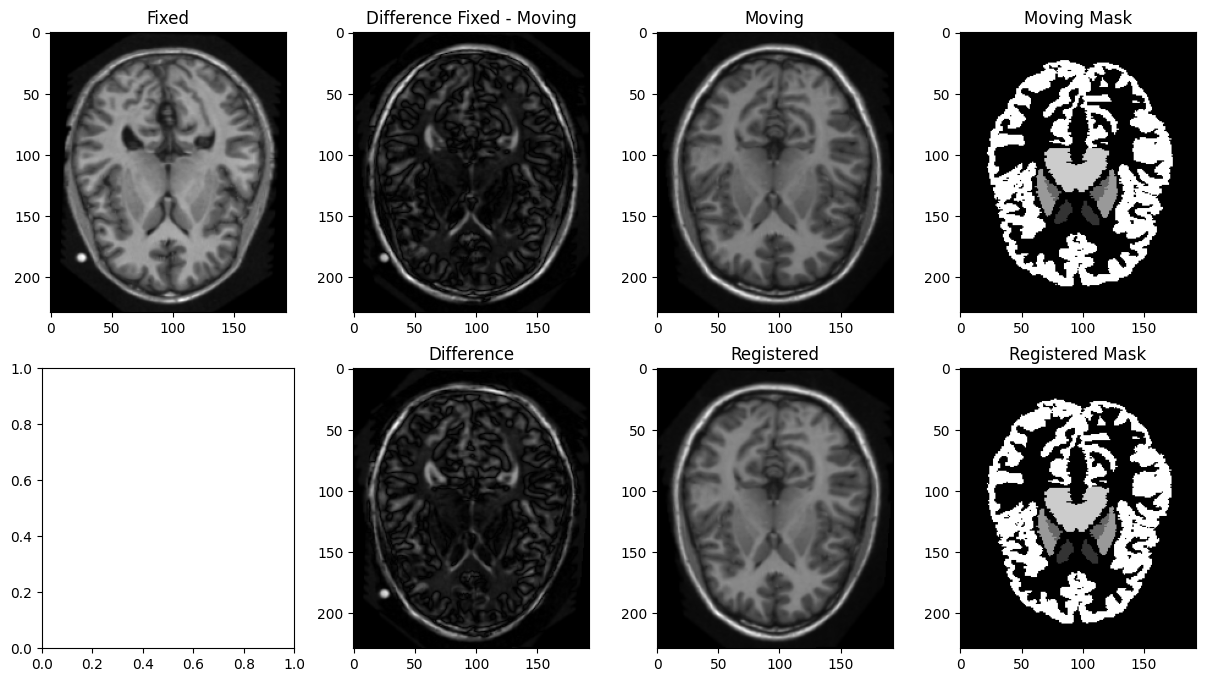

In [3]:
if __name__ == '__main__':
    # Preiskusi delovanje Bspline poravnave
    imgs = sitk.GetArrayFromImage(sitk.ReadImage('data/t1-images.nii.gz'))    
    msks = sitk.GetArrayFromImage(sitk.ReadImage('data/gm-masks.nii.gz'))    
    fixed = imgs[:,:,0]
    moving = imgs[:,:,1]
    moving_msk = msks[:,:,1]
    
    reg_tx = bsplineRegistration(fixed, moving, iBSplineGridSpacing=2, 
                                 iMaxIter=50)
    reg_img = bsplineResample(fixed, moving, reg_tx)
    reg_msk = bsplineResample(fixed, moving_msk, reg_tx, sitk.sitkNearestNeighbor)

    plt.close('all')
    plt.rcParams['figure.figsize'] = [15, 8]

    f, ax = plt.subplots(2,4)
    
    ax[0,0].imshow(fixed, cmap='gray')
    ax[0,0].set_title('Fixed')

    ax[0,2].imshow(moving, cmap='gray')
    ax[0,2].set_title('Moving')

    ax[0,3].imshow(moving_msk, cmap='gray')
    ax[0,3].set_title('Moving Mask')

    ax[0,1].imshow(np.abs(fixed.astype('float') - moving.astype('float')), 
      cmap='gray')
    ax[0,1].set_title('Difference Fixed - Moving')

    ax[1,1].imshow(np.abs(fixed.astype('float') - reg_img.astype('float')), 
      cmap='gray')
    ax[1,1].set_title('Difference')

    ax[1,2].imshow(reg_img, cmap='gray')
    ax[1,2].set_title('Registered')

    ax[1,3].imshow(reg_msk, cmap='gray')
    ax[1,3].set_title('Registered Mask')


2. Napišite funkcijo za razgradnjo na osnovi poravnave in preslikovanja značk:
```python	
def labelPropagation( iFixed, iMoving, iMovingLabelMap ):
		return oFixedLabelMap
```
pri čemer `iFixed` in `iMoving` predstavljata referenčno in premično vhodno 2D sliko. Premični sliki pripada tudi vhodna maska značk `iMovingLabelMap`, ki jih želimo z netogo poravnavo preslikati na referenčno sliko. Funkcija naj v spremenljivki `oFixedLabelMap` vrne v prostor referenčne slike preslikane značke `iMovingLabelMap`.

 Naj prva prečna rezina v sliki `t1-images.nii.gz` predstavlja referenčno sliko, ki jo želimo razgraditi. Preizkusite delovanje funkcije tako, da maske na vseh ostalih rezinah preslikate v to referenčno rezino. Posamezno premično rezino in pripadajočo rezino z masko v sliki `gm-masks.nii.gz` preslikajte v prostor referenčne slike in prikažite.

 Vrednotite uspešnost razgradnje z Diceovim koeficientom (`evalDice`) tako, da maske preslikanih značk primerjate z masko ročno določenih značk na referenčni rezini. Izračunajte povprečno, minimalno in maksimalno vrednost Diceovega koeficienta za vsako od petih $GM$ struktur ($l=\{ 1, 2, 3, 4, 5 \}$) preko vseh preslikanih mask značk.

In [4]:
def labelPropagation(iFixed, iMoving, iMovingLabelMap):
    oTx = bsplineRegistration(iFixed, iMoving, 7, 150)
    oFixedLabelMap = bsplineResample(iFixed, iMovingLabelMap, oTx, 
                                   sitk.sitkNearestNeighbor)
    return oFixedLabelMap


# Poravnava slik na referenčno sliko in vrednotenje
### BEGIN SOLUTION
fixed = imgs[:,:,0] # Več slik imamo, s tem vzamemo eno
reg_masks = []
dice_score = []

for i in range(1, imgs.shape[-1]):
    reg_masks.append(labelPropagation(fixed, imgs[:,:,i], msks[:,:,i]))
    dice_score.append(evalDice(msks[:,:,0], reg_masks[-1]))
    print('\n')



### END SOLUTION

Dice(CAUDATE)=0.892
Dice(PALLIDUM)=0.784
Dice(PUTAMEN)=0.830
Dice(THALAMUS)=0.870
Dice(CORTEX)=0.687


Dice(CAUDATE)=0.859
Dice(PALLIDUM)=0.813
Dice(PUTAMEN)=0.872
Dice(THALAMUS)=0.889
Dice(CORTEX)=0.647


Dice(CAUDATE)=0.798
Dice(PALLIDUM)=0.832
Dice(PUTAMEN)=0.843
Dice(THALAMUS)=0.890
Dice(CORTEX)=0.671


Dice(CAUDATE)=0.855
Dice(PALLIDUM)=0.703
Dice(PUTAMEN)=0.769
Dice(THALAMUS)=0.843
Dice(CORTEX)=0.624


Dice(CAUDATE)=0.752
Dice(PALLIDUM)=0.805
Dice(PUTAMEN)=0.819
Dice(THALAMUS)=0.884
Dice(CORTEX)=0.652


Dice(CAUDATE)=0.888
Dice(PALLIDUM)=0.757
Dice(PUTAMEN)=0.847
Dice(THALAMUS)=0.876
Dice(CORTEX)=0.647


Dice(CAUDATE)=0.849
Dice(PALLIDUM)=0.803
Dice(PUTAMEN)=0.850
Dice(THALAMUS)=0.907
Dice(CORTEX)=0.669


Dice(CAUDATE)=0.841
Dice(PALLIDUM)=0.789
Dice(PUTAMEN)=0.888
Dice(THALAMUS)=0.909
Dice(CORTEX)=0.652


Dice(CAUDATE)=0.753
Dice(PALLIDUM)=0.768
Dice(PUTAMEN)=0.823
Dice(THALAMUS)=0.887
Dice(CORTEX)=0.663




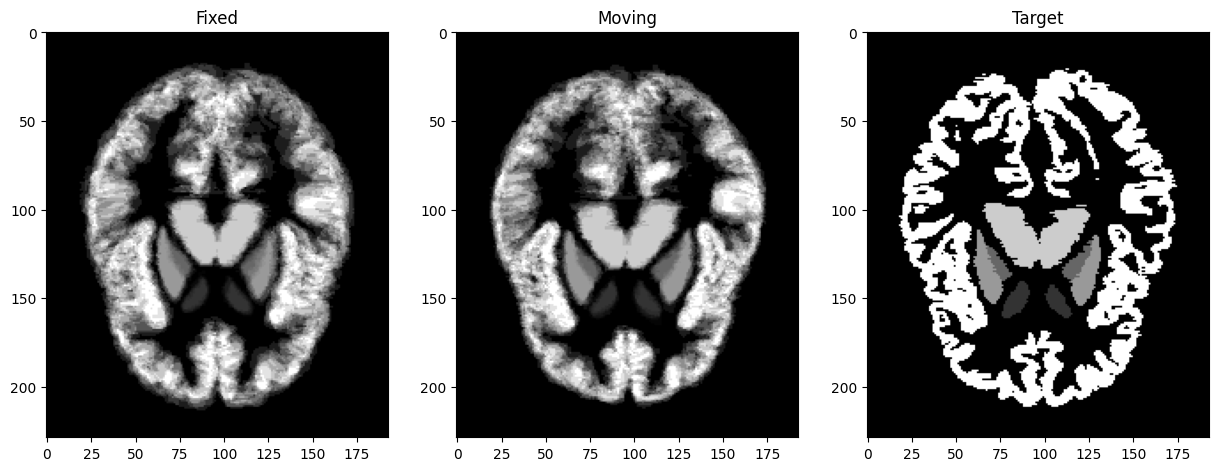

In [5]:
if __name__ == '__main__':
    plt.close('all')
    f, (ax1, ax2, ax3) = plt.subplots(1,3)
    ax1.imshow(np.mean(msks[:,:,1:].astype('float'), axis=-1), cmap='gray')
    ax1.set_title('Fixed')

    ax2.imshow(np.mean(reg_masks, axis=0), cmap='gray')
    ax2.set_title('Moving')   
    
    ax3.imshow(msks[:,:,0], cmap='gray')
    ax3.set_title('Target')    

3. Napišite funkcijo za razgradnjo na osnovi poravnave in zlivanja večih atlasov s pomočjo glasovanja z večino:
```python
	def fusionMajorityVoting( iMovingLabelMaps ):
		return oFixedLabelMap
```
kjer `iMovingLabelMaps` predstavlja seznam (`list`) na referenčno sliko poravnavnih premičnih vhodnih značk, ki jih želimo zliti v novo masko značk. Funkcija naj v spremenljivki `oFixedLabelMap` vrne v prostoru referenčne slike zlito nove masko značk, ki predstavljajo razgradnjo te slike.

 Naj prva prečna rezina v sliki `t1-images.nii.gz` predstavlja referenčno sliko, ki jo želimo razgraditi, ostale slike pa naj bodo premične slike in maske, s katerimi bomo naredili razgradnjo s poravnavo in zlivanjem značk na osnovi glasovanja z večino. Maske značk so dane v `gm-masks.nii.gz`. Vrednotite uspešnost razgradnje z Diceovim koeficientom tako, da z zlivanjem pridobljeno masko značk primerjate z masko ročno določenih značk na referenčni rezini.


In [6]:

def fusionMajorityVoting(iMovingLabelMaps):
    ### BEGIN SOLUTION
    label_count = []
    # Definiraš ozadje
    label_count.append(np.sum(iMovingLabelMaps == 0, axis=-1).astype("int"))

    labels = np.unique(iMovingLabelMaps[iMovingLabelMaps != 0])

    # Definiraš ostale strukture
    for label in labels:
        label_count.append(np.sum(iMovingLabelMaps == label, axis=-1).astype("int"))

    # Določi kater label se pojavi največkrat
    idx = np.argmax(label_count, axis=0)

    oFixedLabelMap = np.zeros_like(idx)

    for i in range(1, len(labels)):
        oFixedLabelMap[idx == i] = labels[i-1]
    

    ### END SOLUTION
    return oFixedLabelMap

Dice(CAUDATE)=0.899
Dice(PALLIDUM)=0.840
Dice(PUTAMEN)=0.885
Dice(THALAMUS)=0.908
Dice(CORTEX)=0.000


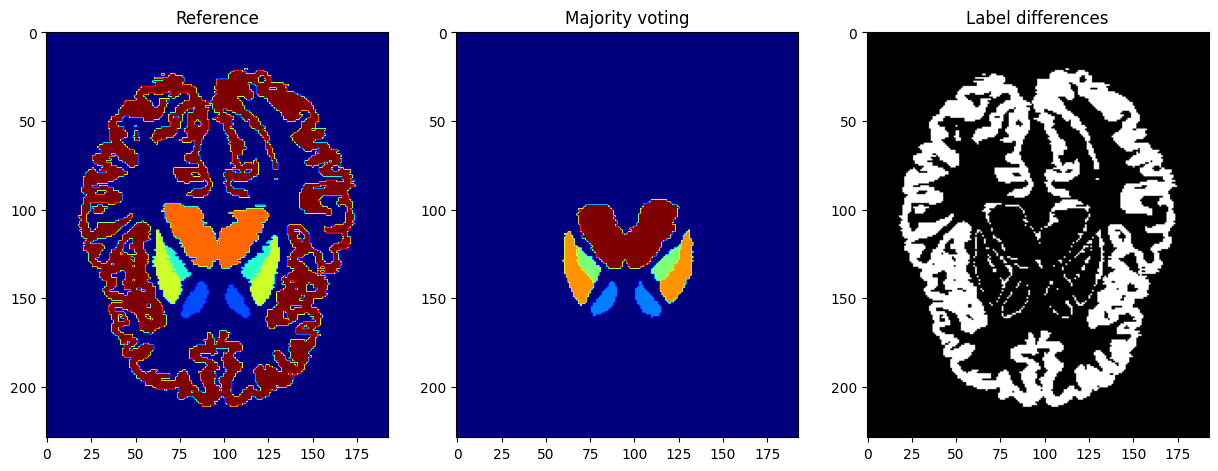

In [7]:
ref_msk = msks[:,:,0]    
mv_msk = fusionMajorityVoting(np.dstack(reg_masks))
evalDice(ref_msk, mv_msk)

if __name__ == '__main__':   
    f, (ax1, ax2, ax3) = plt.subplots(1,3)
    ax1.imshow(ref_msk, cmap='jet')
    ax1.set_title('Reference')

    ax2.imshow(mv_msk, cmap='jet')
    ax2.set_title('Majority voting')

    ax3.imshow(((mv_msk - ref_msk)!=0).astype('uint8'), cmap='gray')
    ax3.set_title('Label differences')    

4. Napišite funkcijo za razgradnjo na osnovi poravnave in zlivanja večih atlasov s pomočjo povprečenja oblik:
```python
    def fusionShapeBasedAveraging( iMovingLabelMaps ):
		return oFixedLabelMap
```
kjer `iMovingLabelMaps` predstavlja seznam (`list`) na referenčno sliko poravnavnih premičnih vhodnih značk, ki jih želimo zliti v novo masko značk. Funkcija naj v spremenljivki `oFixedLabelMap` vrne v prostoru referenčne slike zlito nove masko značk, ki predstavljajo razgradnjo te slike.

 Za izračun polja Evklidskih razdalj za dano masko lahko uporabite funkcijo `SignedMaurerDistanceMap(iMask, squaredDistance=False)` v knjižnici `SimpleITK`.

 Naj prva prečna rezina v sliki `t1-images.nii.gz` predstavlja referenčno sliko, ki jo želimo razgraditi, ostale slike pa naj bodo premične slike in maske, s katerimi bomo naredili razgradnjo s poravnavo in zlivanjem značk na osnovi glasovanja z večino. Maske značk so dane v `gm-masks.nii.gz`. Vrednotite uspešnost razgradnje z Diceovim koeficientom tako, da z zlivanjem pridobljeno masko značk primerjate z masko ročno določenih značk na referenčni rezini.

In [8]:

def fusionShapeBasedAveraging(iMovingLabelMaps):
    
    # za vse maske z isto znacko izracunamo razdaljo in jo povprecimo
    def distanceAverage(masks):
        dist = []
        for i in range(masks.shape[-1]):   # za vsako masko
            distmap = sitk.GetArrayFromImage(   # izracunamo polje Evklidskih razdalij
                    sitk.SignedMaurerDistanceMap(
                            sitk.GetImageFromArray(
                                    masks[:,:,i].astype('uint8')), 
                                    squaredDistance=False))
            dist.append(distmap) # pripnemo na seznam
        # stack: zlozi po novi dimenziji; axis doloci kateri (default 0)
        return np.mean(np.stack(dist, axis=-1),axis=-1)
    
    
    labels = np.unique(iMovingLabelMaps[iMovingLabelMaps != 0])  # znacke razlicne od 0  
    labdist = []
    # ozadje
    labdist.append(distanceAverage(iMovingLabelMaps == 0))  # povprecna razdalja do odzadja
    # ospredje
    lab = []
    for k in labels:
        lab.append(k)
        labdist.append(distanceAverage(iMovingLabelMaps == k))  # povprecna razdalja do znacke k
    idx = np.argmin(labdist,axis=0)
    oFixedLabelMap = np.zeros_like(idx)
    for i in range(1,len(lab)+1):
        oFixedLabelMap[idx == i] = lab[i-1]
    
    return oFixedLabelMap

ref_msk = msks[:,:,0]    
sba_msk = fusionShapeBasedAveraging(np.dstack(reg_masks))
evalDice(ref_msk, sba_msk)


Dice(CAUDATE)=0.899
Dice(PALLIDUM)=0.854
Dice(PUTAMEN)=0.888
Dice(THALAMUS)=0.912
Dice(CORTEX)=0.720


[0.8988095238095238,
 0.8536155202821869,
 0.8882480173035328,
 0.9116660454714871,
 0.7200586146649383]

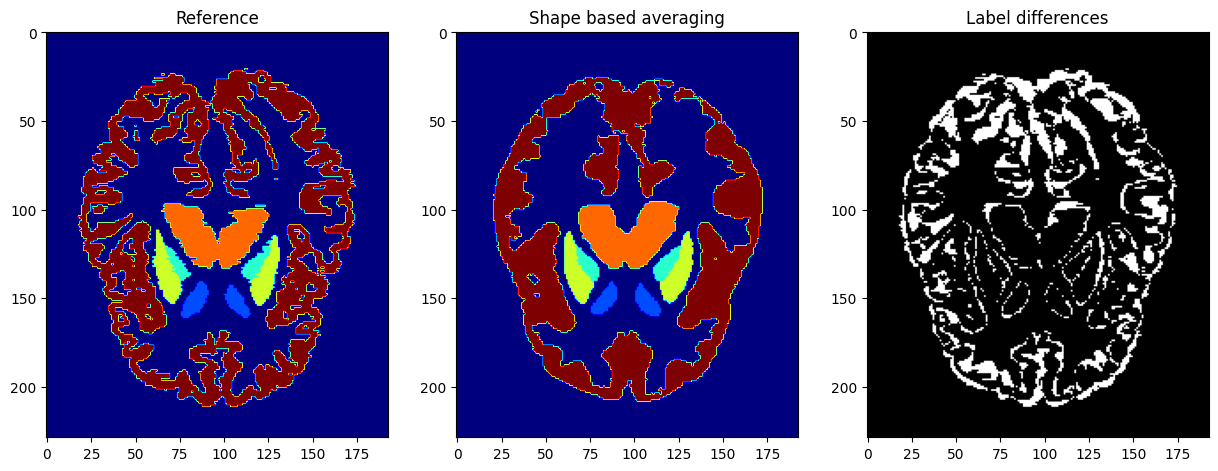

In [9]:
if __name__ == '__main__':   
    f, (ax1, ax2, ax3) = plt.subplots(1,3)
    ax1.imshow(ref_msk, cmap='jet')
    ax1.set_title('Reference')

    ax2.imshow(sba_msk, cmap='jet')
    ax2.set_title('Shape based averaging')

    ax3.imshow(((sba_msk - ref_msk)!=0).astype('uint8'), cmap='gray')
    ax3.set_title('Label differences')  

5. Napišite funkcijo za izgradnjo referenčnega atlasa z aritmetičnim povprečenjem in nepristransko skupinsko poravnavo slik:
```python 
    def atlasConstruction( iImages, iLabelMaps, iMaxIter ):
		return oAtlasImage, oImages, oLabelMaps
```
 kjer `iImages` predstavlja seznam (`list`) 2D slik, `iLabelMaps` pa seznam (`list`) mask značk, ki pripadajo vhodnim 2D slikam. Funkcija iterativno z **aritmetičnim povprečenjem** poravnavnih slik zgradi referenčni atlas, na katerega se nato z netogo poravnavo poravnajo vse 2D slike, nato se zgradi nov referenčni atlas, itd. Postopek naj se iterativno ponovi do `iMaxIter` števila iteracij. Funkcija naj po zadnji iteraciji vrne referenčni atlas v spremenljivki `oAtlasImage` in pa seznam poravnanih 2D slik in pripadajočih značk v spremenljivkah `oImages` in `oLabelMaps`.

 Uporabite vse prečne rezine v sliki `t1-images.nii.gz` in pripadajoče maske značk `gm-masks.nii.gz` za izgradnjo referenčnega atlasa. Prikažite referenčni atlas in preverite, da so prečne rezine in maske značk v spremenljivkah `oImages` in `oLabelMaps` medsebojno poravnane.

 Pridobljene poravnane slike in maske maske značk uporabite za razgradnjo prve rezine `oImages`, podobno kot pri zgornjih nalogah tako, da pri zlivanju izpustite prvo rezino. Preverite delovanje postopka `fusionMajorityVoting()` in `fusionShapeBasedAveraging()`. Vrednotite uspešnost razgradnje z Diceovim koeficientom tako, da z zlivanjem pridobljeno masko značk primerjate z masko ročno določenih značk na prvi rezini.

In [10]:
def atlasRegistration(images, masks, maxiter=5, verbose=True):  
    
    # , outiter=False
    
    reg_images = images   #ce maxiter=0
    reg_masks = masks
    iter = 0
    while maxiter>0:
        if verbose:
            print('iteracija: {}'.format(iter))
            iter += 1
        atlas = np.mean(reg_images.astype('float'), axis=-1)
        
        # inicializacija poravnanih slik in mask
        reg_images = []
        reg_masks = []

        for i in range(images.shape[-1]):   # vse slike poravnamo na atlas
            if verbose:
                print('\tporavnava: {}/{}'.format(i+1, images.shape[-1]))
            img = images[:,:,i]
            msk = masks[:,:,i]
            # poravnava in vzorčenje
            reg_tx = bsplineRegistration(atlas, img, 8, 50)
            reg_img = bsplineResample(atlas, img, reg_tx)
            reg_msk = bsplineResample(atlas, msk, reg_tx, sitk.sitkNearestNeighbor)
            
            reg_images.append(reg_img)
            reg_masks.append(reg_msk)
            
        reg_images = np.dstack(reg_images)   # zdruzimo v 3 dim
        reg_masks = np.dstack(reg_masks)
        maxiter -= 1
        
    images = reg_images
    masks = reg_masks
    atlas = np.mean(images.astype('float'), axis=-1)

    return atlas, images, masks

# Zazenemo izgradnjo atlasa
atlas5, images5, masks5 = atlasRegistration(imgs, msks)


iteracija: 0
	poravnava: 1/10
	poravnava: 2/10
	poravnava: 3/10
	poravnava: 4/10
	poravnava: 5/10
	poravnava: 6/10
	poravnava: 7/10
	poravnava: 8/10
	poravnava: 9/10
	poravnava: 10/10
iteracija: 1
	poravnava: 1/10
	poravnava: 2/10
	poravnava: 3/10
	poravnava: 4/10
	poravnava: 5/10
	poravnava: 6/10
	poravnava: 7/10
	poravnava: 8/10
	poravnava: 9/10
	poravnava: 10/10
iteracija: 2
	poravnava: 1/10
	poravnava: 2/10
	poravnava: 3/10
	poravnava: 4/10
	poravnava: 5/10
	poravnava: 6/10
	poravnava: 7/10
	poravnava: 8/10
	poravnava: 9/10
	poravnava: 10/10
iteracija: 3
	poravnava: 1/10
	poravnava: 2/10
	poravnava: 3/10
	poravnava: 4/10
	poravnava: 5/10
	poravnava: 6/10
	poravnava: 7/10
	poravnava: 8/10
	poravnava: 9/10
	poravnava: 10/10
iteracija: 4
	poravnava: 1/10
	poravnava: 2/10
	poravnava: 3/10
	poravnava: 4/10
	poravnava: 5/10
	poravnava: 6/10
	poravnava: 7/10
	poravnava: 8/10
	poravnava: 9/10
	poravnava: 10/10


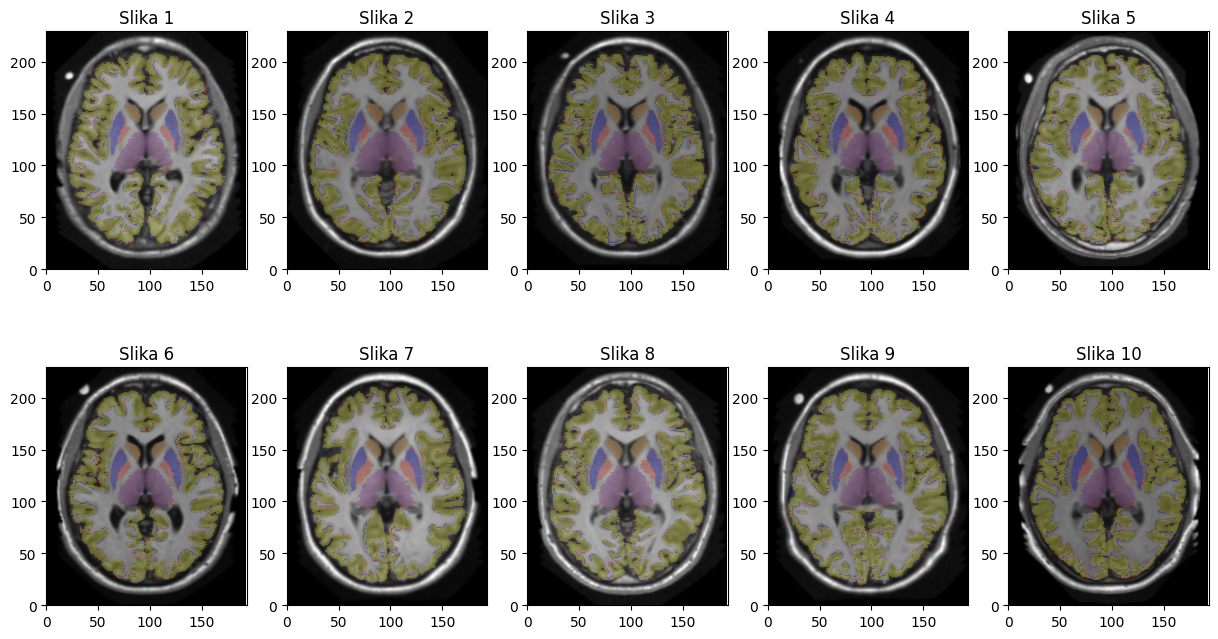

In [11]:
if __name__=='__main__':    
    # preverimo, da so precne rezine in maske znack medsebojno poravnane z izrisom 
    mask_cmap = ListedColormap([[0., 0., 0., 0.], 'darkorange', 'red', 'blue', 'purple', 'yellow'])

    n = images5.shape[-1]
    ncol = 5
    nrow = int(np.ceil(n/ncol))
    fix, ax = plt.subplots(nrow, ncol)
    
    for a in range(n):
        i = a // ncol
        j = a % ncol
        
        img = images5[:,:, a]
        msk = masks5[:, :, a]
        
        ax[i, j].imshow(img, cmap='gray', origin='lower')
        ax[i, j].imshow(msk, cmap=mask_cmap, origin='lower', alpha=0.2)
        ax[i, j].set_xlim(0, img.shape[1])
        ax[i, j].set_ylim(0, msk.shape[0])
        ax[i, j].set_title('Slika {}'.format(a+1))

Majority Voting:
Dice(CAUDATE)=0.910
Dice(PALLIDUM)=0.849
Dice(PUTAMEN)=0.890
Dice(THALAMUS)=0.904
Dice(CORTEX)=0.000
Average:  0.711

Shape Based Averaging:
Dice(CAUDATE)=0.911
Dice(PALLIDUM)=0.845
Dice(PUTAMEN)=0.891
Dice(THALAMUS)=0.906
Dice(CORTEX)=0.739
Average:  0.859


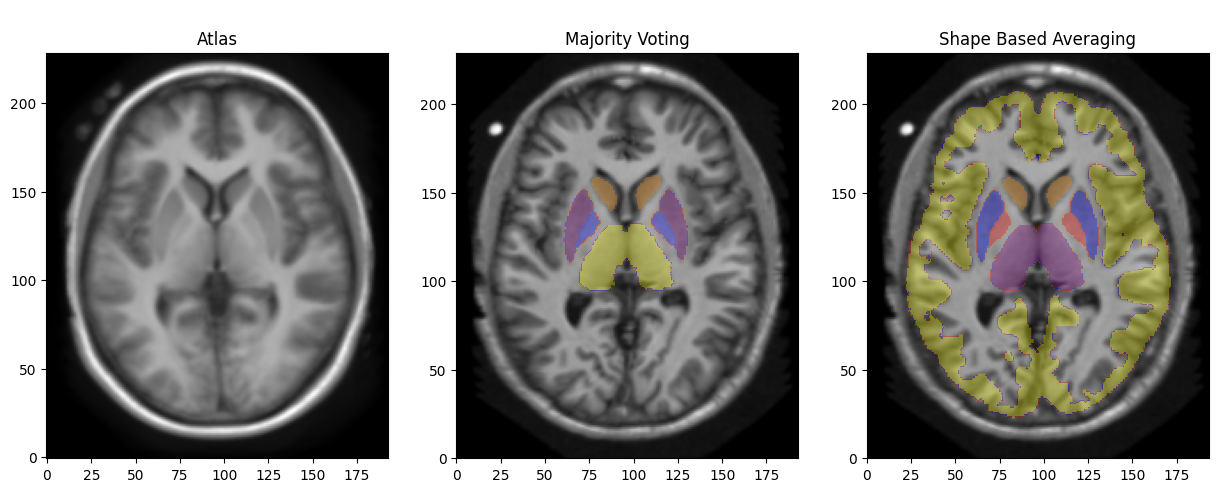

In [12]:
# prikaz atlasa in zlivanje znack 

if __name__ == '__main__':
    
    # referencna slika -- prva rezina poravnanih slik
    ref_msk = masks5[:,:,0]    
    ref_img = images5[: ,:,0]   

    
    print('Majority Voting:')
    majority_msk = fusionMajorityVoting(masks5[:,:,1:])
    dice_majority = np.round(np.mean(np.array(evalDice(ref_msk, majority_msk))), 3)
    print('Average: ', dice_majority)
    
    print('\nShape Based Averaging:')
    sba_msk = fusionShapeBasedAveraging(masks5[:,:,1:])
    dice_sba = np.round(np.mean(np.array(evalDice(ref_msk, sba_msk))), 3)
    print('Average: ', dice_sba)
    
    # prikaz 
    n = images5.shape[-1]
    ncol = 5
    nrow = int(np.ceil(n/ncol))
    fix, ax = plt.subplots(1, 3)
    # atlas
    ax[0].imshow(atlas5, cmap='gray', origin='lower')
    ax[0].set_title('Atlas')
    # Majority voting
    ax[1].imshow(ref_img, cmap='gray', origin='lower')
    ax[1].imshow(majority_msk, cmap=mask_cmap, origin='lower', alpha=0.3)
    ax[1].set_xlim(0, img.shape[1])
    ax[1].set_ylim(0, msk.shape[0])
    ax[1].set_title('\nMajority Voting')
    # Shape based averaging
    ax[2].imshow(ref_img, cmap='gray', origin='lower')
    ax[2].imshow(sba_msk, cmap=mask_cmap, origin='lower', alpha=0.3)
    ax[2].set_xlim(0, img.shape[1])
    ax[2].set_ylim(0, msk.shape[0])
    ax[2].set_title('Shape Based Averaging')